# Recherche séquentielle

In [2]:
def recherche_seq(tab, e):
    """
    Détermine si e dans tab

    Paramètres:
        tab : tableau d'entiers
        e : un entier

    Retour:
        booléen	
    """
    trouve = False
    for element in tab:
        if e == element:
            trouve = True
    return trouve

def recherche_seq2(tab, e):
    """
    Détermine si e dans tab

    Paramètres:
        tab : tableau d'entiers
        e : un entier

    Retour:
        booléen	
    """
    for element in tab:
        if e == element:
            return True
    return False

In [5]:
import time

for m in range(1, 9):   
    taille = 10**m
    tab = list(range(taille))
    e = taille + 1
    chrono = time.perf_counter()
    recherche_seq2(tab, e)
    print(f"taille = {taille}, temps(s) = {time.perf_counter() - chrono}")

taille = 10, temps(s) = 1.0888001270359382e-05
taille = 100, temps(s) = 1.3110999134369195e-05
taille = 1000, temps(s) = 3.356500019435771e-05
taille = 10000, temps(s) = 0.0003139219988952391
taille = 100000, temps(s) = 0.003978888998972252
taille = 1000000, temps(s) = 0.03422377499737195
taille = 10000000, temps(s) = 0.34727345899955253
taille = 100000000, temps(s) = 3.385230176998448


# Devinette

In [1]:
def devinette(gauche, droite):
    """
    Paramètres : gauche et droite des entiers
    Précondition : 0 <= gauche < droite
    Valeur renvoyée : un entier, devine par dichotomie l'entier n choisi par 
    l'utilisateur avec gauche <= secret < droite
    """
    assert 0 <= gauche < droite
    while droite - gauche > 1:
        #variant droite - gauche - 2
        #invariant : gauche < droite
        if droite - gauche == 1:
            return gauche
        milieu = (gauche + droite) // 2
        reponse = int(input('Plus grand ou égal à ' + str(milieu) + ' (1 pour oui et 0 pour Non) ?'))
        print(reponse)
        if reponse == 1:
            gauche = milieu
        else:
            droite = milieu        
    return gauche

# Recherche dichotomique dans un tableau trié

In [8]:
import random

def est_croissant(tab):
    """
    Détermine si tab est dans l'ordre croissant    
    Paramètre : 
        tab un tableau d'entiers    
    Retour : 
        un booléen
    """
    for i in range(0, len(tab) - 1):
        if tab[i] > tab[i+1]:
            return False
    return True

def recherche_dicho_tab(valeur, tab):
    """
    Renvoie l'index d'une occurence de valeur dans tab
     ou -1 si valeur pas dans tab
    Paramètres : 
        valeur : un entier
        tab : un tableau d'entiers
    Retour:
        un entier 
    """
    gauche, droite = 0, len(tab)
    while droite - gauche >= 1:
        #invariant :  0 <= gauche et droite <= len(tab)
        #invariant : element dans tab[gauche:droite]
        milieu = (gauche + droite) // 2
        if tab[milieu] > valeur:
            droite = milieu
        elif tab[milieu] < valeur:
            gauche = milieu + 1
        else:
            return milieu
    return -1

def recherche_dicho_tab2(valeur, tab):
    """
    Renvoie l'index de première occurence de valeur dans tab
     ou -1 si valeur pas dans tab
    Paramètres : 
        valeur : un entier
        tab : un tableau d'entiers
    Retour:
        un entier 
    """
    gauche, droite = 0, len(tab) - 1
    while droite - gauche >= 0:
        #invariant :  0 <= gauche et droite < len(tab)
        #invariant : element dans tab[gauche:droite + 1]
        milieu = (gauche + droite) // 2
        if tab[milieu] > valeur:
            droite = milieu - 1
        elif tab[milieu] < valeur:
            gauche = milieu + 1
        else:
            return milieu
    return -1



def recherche_dicho_tab_compteur(valeur, tab):
    """
    Renvoie un tuple :
    (index de première occurrence de valeur dans ta ou -1, compteur de comparaisons)
    Paramètres : 
        valeur : un entier
        tab : un tableau d'entiers
    Retour:
        un tuple de deux entiers
    """
    gauche, droite = 0, len(tab) - 1
    compteur = 0
    while droite - gauche >= 0:
        #invariant :  0 <= gauche et droite < len(tab)
        #invariant : element dans tab[gauche:droite + 1]
        compteur += 1
        milieu = (gauche + droite) // 2
        if tab[milieu] > valeur:
            droite = milieu - 1
        elif tab[milieu] < valeur:
            gauche = milieu + 1
        else:
            return (milieu, compteur)
    return (-1, compteur)

def recherche_sequentielle(valeur, tab):
    """
    Renvoie l'index de première occurence de valeur dans tab
     ou -1 si valeur pas dans tab
    Paramètres : 
        valeur : un entier
        tab : un tableau d'entiers
    Retour:
        un entier 
    """
    assert len(tab) > 0 
    for k in range(len(tab)):
        if tab[k] == valeur:
            return k
    return -1

def recherche_python(valeur:int, tab:List[int])->Union[int,None]:
    return valeur in tab


# tests unitaires
assert recherche_dicho_tab(2, [1,2, 2, 3]) in [1, 2]
assert recherche_dicho_tab(2, [1,2, 4, 5]) == 1
assert recherche_dicho_tab(2, [2, 4, 5]) == 0
assert recherche_dicho_tab(5, [2, 4, 5]) == 2
assert recherche_dicho_tab(3, [2, 4, 5]) == -1
assert recherche_dicho_tab(6, [2, 4, 5]) == -1
assert recherche_dicho_tab(0, [2, 4, 5]) == -1

In [9]:
[(k, recherche_dicho_tab_compteur(2**k, list(range(2**k)))[1]) for k in range(1, 15)]

[(1, 2),
 (2, 3),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (9, 10),
 (10, 11),
 (11, 12),
 (12, 13),
 (13, 14),
 (14, 15)]

# Comparaison des recherches dichotomique et séquentielle

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import time 


def chronometre_pire_cas(f, taille_tableau):
    """
    Recherche avec la fonction  f un élément n'appartenant
    pas à un tableau de taille taille_tableau
    Renvoie le temps d'exécution
    """
    tab = list(range(taille_tableau))
    debut = time.perf_counter()
    _ = f(taille_tableau, tab)
    return time.perf_counter() - debut

def temps_moyen_pire_cas(f, taille_tableau, taille_echantillon):
    """
    Renvoie le temps d'exécution moyen d'une recherche avec f 
    dans le pire des cas sur un échantillon de taille_echantillon
    tableaux de taille taille_tableau
    """
    temps_cumul = 0
    for _ in range(taille_echantillon):
        temps_cumul = temps_cumul + chronometre_pire_cas(f, taille_tableau)
    return temps_cumul / taille_echantillon


def evolution_ratio_diff_pire_cas(f, benchmark):
    """
    Prend en paramètre une fonction de recherche dans un tableau (séquentielle ou dichotomique)
    Affiche les temps moyens d'exécution de la recherche dans le pire des cas 
    sur des échantillons de tableaux de même taille choisie dans une liste  benchmark de tailles croissantes. 
    Affiche aussi le quotient et la différence entre les temps moyens pour des tailles successives.    
    """
    ratio = 0
    difference = 0
    temps_precedent = -1
    for taille in benchmark:
        temps = temps_moyen_pire_cas(f,taille, 10)
        if temps_precedent >= 0:
            ratio = temps / temps_precedent
            difference = temps - temps_precedent
        temps_precedent = temps
        print(f"{f.__name__}({taille},list(range({taille}))) en {temps:.1e} secondes,\n tps/tps_pre = {ratio:.1e} et tps - tps_pre = {difference:.1e}\n")
        

def graphique_temps_pire_cas(f, benchmark, chemin_fichier,semilogx):
    """
    Prend en paramètre une fonction de recherche dans un tableau (séquentielle ou dichotomique)
    Affiche un graphique avec les temps moyens d'exécution de la recherche dans le pire des cas
    sur des échantillons de tableaux de même taille choisie dans une liste  benchmark de tailles croissantes,
    en fonction des tailles   
    """
    tab_temps = [temps_moyen_pire_cas(f,taille, 10) for taille in benchmark]
    if semilogx:
        plt.semilogx(benchmark, tab_temps, marker='o', linestyle='', color='blue')
    else:
        plt.plot(benchmark, tab_temps, marker='o', linestyle='', color='blue')
    plt.xlabel('Taille du tableau')
    plt.ylabel("Temps d'exécution")
    plt.title(f"{f.__name__}")
    plt.savefig(chemin_fichier)
    plt.show()
    
def graphique_comparaison_temps_pire_cas(f1, f2, benchmark, chemin_fichier, semilogx, semilogy):
    """
    Prend en paramètre deux fonctions f1 et f2 de recherche dans un tableau.
    Exécute f1 et f2 sur des échantillons de tableaux de même taille dans le pire des cas.
    Affiche un graphique avec les temps de f1 (y) en fonction de ceux de f2 (x).
    semilogx et semilogy sont des booléens fixant des échelles logarithmiques
    ou linéaires sur les axes    
    """    
    ty = [temps_moyen_pire_cas(f1,taille, 10)  for taille in benchmark]
    tx = [temps_moyen_pire_cas(f2,taille, 10)  for taille in benchmark]
    if semilogx:
        plt.semilogx(tx, ty, marker='o', linestyle='', color='blue')
    elif semilogy:
        plt.semilogy(tx, ty, marker='o', linestyle='', color='blue')
    else:
        plt.plot(tx, ty, marker='o', linestyle='', color='blue')
    plt.xlabel('Temps recherche dicho')
    plt.ylabel("Temps recherche séquentielle")
    plt.savefig(chemin_fichier)
    plt.show()

recherche_sequentielle(1000,list(range(1000))) en 7.9e-05 secondes,
 tps/tps_pre = 0.0e+00 et tps - tps_pre = 0.0e+00

recherche_sequentielle(10000,list(range(10000))) en 7.7e-04 secondes,
 tps/tps_pre = 9.8e+00 et tps - tps_pre = 6.9e-04

recherche_sequentielle(100000,list(range(100000))) en 7.0e-03 secondes,
 tps/tps_pre = 9.1e+00 et tps - tps_pre = 6.3e-03

recherche_sequentielle(1000000,list(range(1000000))) en 6.8e-02 secondes,
 tps/tps_pre = 9.8e+00 et tps - tps_pre = 6.1e-02

recherche_sequentielle(10000000,list(range(10000000))) en 6.8e-01 secondes,
 tps/tps_pre = 9.9e+00 et tps - tps_pre = 6.1e-01

recherche_dicho_tab(1000,list(range(1000))) en 3.8e-06 secondes,
 tps/tps_pre = 0.0e+00 et tps - tps_pre = 0.0e+00

recherche_dicho_tab(10000,list(range(10000))) en 5.8e-06 secondes,
 tps/tps_pre = 1.5e+00 et tps - tps_pre = 2.0e-06

recherche_dicho_tab(100000,list(range(100000))) en 9.6e-06 secondes,
 tps/tps_pre = 1.7e+00 et tps - tps_pre = 3.8e-06

recherche_dicho_tab(1000000,lis

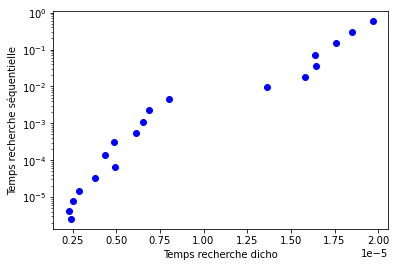

In [20]:
evolution_ratio_diff_pire_cas(recherche_sequentielle, [10 ** k for k in range(3, 8)])
evolution_ratio_diff_pire_cas(recherche_dicho_tab, [10 ** k for k in range(3, 8)])
graphique_comparaison_temps_pire_cas(recherche_sequentielle, recherche_dicho_tab2, [2 ** k for k in range(5, 24)], "comparaison_seq_dicho.png", semilogx = False, semilogy=True)